In [3]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import os
import pandas_read_xml as pdx
from nltk.corpus import stopwords


In [2]:
file_path = '/Users/rashidalawadhi/Documents/GitHub/data_analysis/hygiene_ratings/hygiene_data/'

In [3]:
files = os.listdir(file_path)
print(len(files))
files.sort()
files.remove('.DS_Store')
files

FileNotFoundError: [Errno 2] No such file or directory: '/Users/rashidalawadhi/Documents/GitHub/data_analysis/hygiene_ratings/hygiene_data/'

In [4]:
# # Reading the first file
# file_path_file1 = os.path.join(file_path, 'cityoflondon.xml')
# tree = ET.parse(file_path_file1)
# root = tree.getroot()
# print(root.tag, root.attrib)

In [5]:
def create_df(path ):
    df = pdx.read_xml(path)
    df = pdx.fully_flatten(df)
    df = df[['FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessName',  'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessType','FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|RatingValue', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|Scores|Hygiene']]
    df = df.rename(columns={'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessName': 'name', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessType': 'type', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|RatingValue': 'rating','FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|Scores|Hygiene' : 'hygiene' })
    df = df.drop(df[(df['rating'] == 'Exempt') | (df['rating'] == 'AwaitingInspection')].index)
    df = df.dropna().reset_index(drop=True)
    df = df.astype({'rating':int, 'hygiene':int})
    
    return df


In [6]:
# df = create_df('/Users/rashidalawadhi/Documents/GitHub/data_analysis/hygiene_ratings/hygiene_data/richmond.xml')

In [7]:
# sn.displot(data=df, x='rating')
# plt.show()


In [8]:
#calculates the percentage of businesses with a particular rating.
def rating_percentage(num, df, column):
    tot = 0
    for i in df[column]:
        if i == num:
            tot+=1

    
    tot_norm = tot/len(df[column])*100
    return round(tot_norm)

In [9]:
a = []
for i in files:
    l_df = create_df('hygiene_ratings/hygiene_data/'+i)
    a.append([i.replace('.xml',''),rating_percentage(5, l_df, 'rating'),rating_percentage(4, l_df, 'rating'),rating_percentage(3, l_df, 'rating'),rating_percentage(2, l_df, 'rating'),rating_percentage(1, l_df, 'rating'),rating_percentage(0, l_df, 'rating')])
    

In [10]:
borough_df = pd.DataFrame(a)
borough_df = borough_df.rename(columns={0:'borough', 1:'5_rating', 2:'4_rating', 3:'3_rating', 4:'2_rating', 5:'1_rating', 6:'0_rating'})

In [45]:
borough_df.loc[borough_df['5_rating']>=70]

,borough,5_rating,4_rating,3_rating,2_rating,1_rating,0_rating
2,bexley,72,16,8,2,2,0
4,bromley,73,14,10,1,2,0
6,cityoflondon,87,8,2,2,1,0
10,greenwich,77,17,4,1,1,0
12,haringey,76,14,6,3,1,1
15,hillington,70,17,8,2,3,1
16,hounslow,71,20,6,2,1,0
17,hs_fulham,76,15,7,1,1,0
19,kensington_chelsea,86,8,4,1,0,0
23,merton,76,14,8,1,1,0


<Figure size 1000x1000 with 0 Axes>

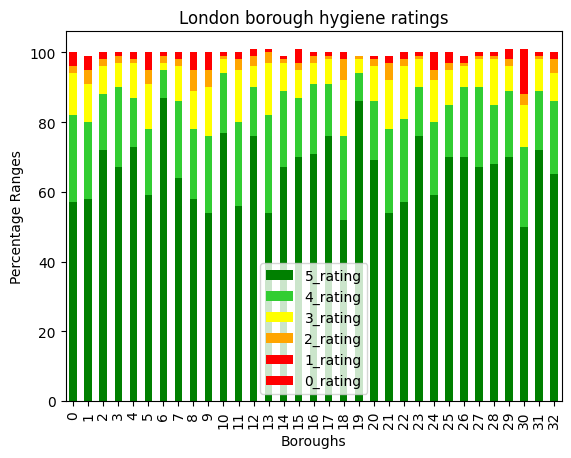

In [43]:
plt.figure(figsize=(10,10))

borough_df.plot(kind='bar', stacked=True, color=['green', 'limegreen', 'yellow','orange', 'red', 'red'])
 
# Add Title and Labels

plt.title('London borough hygiene ratings')
plt.xlabel('Boroughs')
plt.ylabel('Percentage Ranges')
plt.savefig('hygiene_london')
plt.show()

In [13]:
borough_df['borough'][18]

'islington'

In [14]:
geo_df = pdx.read_xml('hygiene_ratings/hygiene_data/barnet.xml')

In [15]:
pdx.fully_flatten(geo_df)['FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|RatingValue'][2453]

'Exempt'

In [19]:
def create_geo_df(path ):
    df = pdx.read_xml(path)
    df = pdx.fully_flatten(df)
    df = df[['FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessName',  'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessType','FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|RatingValue','FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|Geocode|Latitude', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|Geocode|Longitude' ]]
    df = df.rename(columns={'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessName': 'name', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|BusinessType': 'type', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|RatingValue': 'rating', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|Geocode|Latitude' : 'latitude', 'FHRSEstablishment|EstablishmentCollection|EstablishmentDetail|Geocode|Longitude':'longitude' })
    df = df.drop(df[(df['rating'] == 'Exempt') | (df['rating'] == 'AwaitingInspection') | (df['rating'] == 'AwaitingPublication')].index)
    df = df.dropna().reset_index(drop=True)
    df = df.astype({'rating':int, 'latitude':float, 'longitude':float})
    
    return df

In [20]:
# for i in files:
#     df_geo = create_geo_df('hygiene_ratings/hygiene_data/'+i)
#     j = i.replace('.xml','.xlsx')
#     path = '/Users/rashidalawadhi/Documents/GitHub/data_analysis/excel_sheets/'+j
#     df_geo.to_excel(path)



In [23]:
#Creates a pandas dataframe which includes geolocation for the whole of london

# tot_df_geo = create_geo_df('hygiene_ratings/hygiene_data/'+'barking_dagenham.xml')
# for i in files:
#     if i != 'barking_dagenham.xml':
#         df_geo = create_geo_df('hygiene_ratings/hygiene_data/'+i)
#         tot_df_geo = pd.concat([tot_df_geo, df_geo], ignore_index=True)



In [25]:
# tot_df_geo.to_excel('/Users/rashidalawadhi/Documents/GitHub/data_analysis/excel_sheets/total_data.xlsx')

In [26]:
# tot_df_geo.to_csv('/Users/rashidalawadhi/Documents/GitHub/data_analysis/excel_sheets/total_data.csv')

In [ ]:
#29/05/2023

In [4]:
df = pd.read_csv('/Users/rashidalawadhi/Documents/GitHub/data_analysis/london-hygiene-rating/excel_sheets/total_data.csv', index_col=0)

In [5]:
df[4:30]

,name,type,rating,latitude,longitude
4,5 Elm's Cafe,Restaurant/Cafe/Canteen,3,51.554493,0.142421
5,5G Burger,Restaurant/Cafe/Canteen,5,51.531839,0.146935
6,6Burgerz,Takeaway/sandwich shop,5,51.525894,0.105279
7,7 TILL 11,Retailers - other,3,51.558435,0.129392
8,786 Halal Meat and Fish,Retailers - other,3,51.542748,0.165952
9,7even Restaurant,Restaurant/Cafe/Canteen,4,51.572121,0.142352
10,97p Knockout,Retailers - other,5,51.537568,0.079432
11,A1 Cash & Carry,Retailers - other,3,51.534006,0.151336
12,Aafio Kenkey Market,Restaurant/Cafe/Canteen,2,51.534985,0.110777
13,Aafio Mini Market,Retailers - other,4,51.534718,0.110646


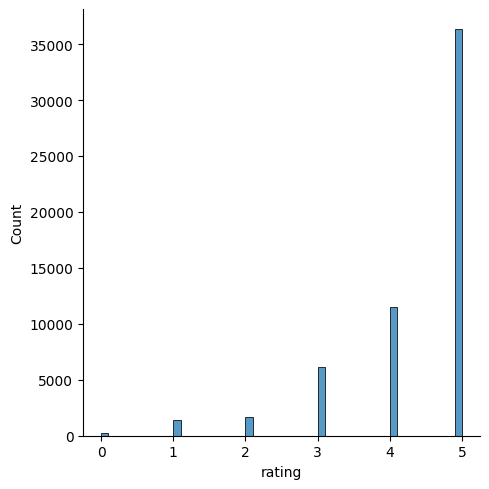

In [6]:
sn.displot(data=df, x='rating', binwidth=0.1)

In [7]:
def build_corpus(data):
    corpus = []
    for sentence in data.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

corpus = build_corpus(df['name'])

/var/folders/8h/mgykypr12rn6hfmp46xcxkwh0000gn/T/ipykernel_2059/1309796465.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for sentence in data.iteritems():


In [8]:
corpus

[['1st', 'Steps', 'Day', 'Nursery', 'LTD'],
 ['212', 'Lounge'],
 ['3', 'Sweet', 'Mrs'],
 ['3D', 'Food', '&', 'Wine', 'LTD', 'T/A', 'Westbury', 'News'],
 ['5', "Elm's", 'Cafe'],
 ['5G', 'Burger'],
 ['6Burgerz'],
 ['7', 'TILL', '11'],
 ['786', 'Halal', 'Meat', 'and', 'Fish'],
 ['7even', 'Restaurant'],
 ['97p', 'Knockout'],
 ['A1', 'Cash', '&', 'Carry'],
 ['Aafio', 'Kenkey', 'Market'],
 ['Aafio', 'Mini', 'Market'],
 ['Abbey', 'Care', 'Home'],
 ['Abbey', "Children's", 'Centre', 'Day', 'Nursery'],
 ['Abbey', 'Kebab', '&', 'Pizza'],
 ['Abbey', 'Mini', 'Market'],
 ['Abbeyfield'],
 ['Abbeyfield', 'Extra', 'Care', 'Society'],
 ['Abbi', 'Superstores'],
 ['Abena', 'Service', 'Station'],
 ['Abigails', 'Cafe'],
 ['Abiglobal'],
 ['Abike', 'Oloogun', 'Ebi', 'Kitchen'],
 ['Abu', 'Discount', 'Store'],
 ['Accesscare', 'Ltd'],
 ['ACIU'],
 ['ACIU', 'Ltd'],
 ['Adom', 'Trading', 'Ltd', 'T/A', '', 'Amazing', 'Grace'],
 ['Agouma'],
 ['Aguona'],
 ['AK', 'Halal', 'Meat', 'LTD'],
 ['Aksular', 'Restaurant'],
 ['A

In [10]:

from gensim.models import Word2Vec
model = Word2Vec(corpus, vector_size=100, min_count=1)

In [34]:

from sklearn.decomposition import PCA

# fit a 2d PCA model to the vectors
vectors = model.wv.vectors
words = list(model.wv.vectors)
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(vectors)

# prepare a dataframe
words = pd.DataFrame(words)
PCA_result = pd.DataFrame(PCA_result)
PCA_result['x_values'] =PCA_result.iloc[0:, 0]
PCA_result['y_values'] =PCA_result.iloc[0:, 1]
PCA_final = pd.merge(words, PCA_result, left_index=True, right_index=True)
PCA_final['word'] =PCA_final.iloc[0:, 0]
PCA_data_complet =PCA_final[['word','x_values','y_values']]

In [35]:

import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style('ticks')
fig = sns.lmplot(x='x_values', y='y_values',
           data = K_means_data,
           fit_reg=False,
           legend=True,
           hue='Cluster')
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.show()

NameError: name 'K_means_data' is not defined

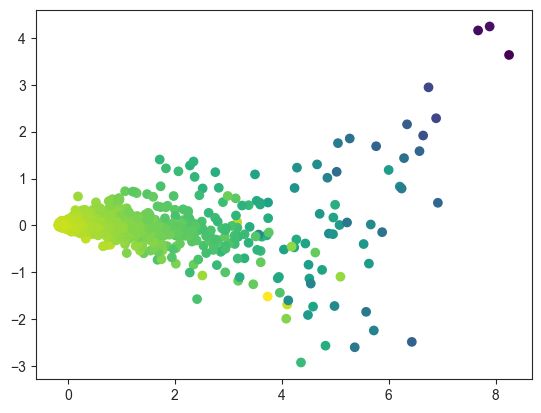

In [42]:
plt.scatter(x=PCA_data_complet['x_values'], y=PCA_data_complet['y_values'],c=PCA_data_complet['word'], cmap='viridis')

In [43]:
PCA_data_complet

,word,x_values,y_values
0,-0.489503,5.082759,0.009690
1,-0.791489,6.434775,-2.482128
2,-0.435611,4.444391,-0.384974
3,-0.707471,5.880245,-0.143142
4,-1.157709,7.890675,4.241835
...,...,...,...
28883,0.003718,-0.097943,0.002749
28884,0.009088,-0.099952,0.013594
28885,-0.006269,-0.103413,0.002693
28886,-0.010725,-0.075323,0.011827
